In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

from depth_h5py_gen import *

%load_ext autoreload
%autoreload 2

celeba_root = "F:/datasets/celeba-hq-256/celeba_hq_256/"
depth_data_root = "E:/experiments/stereo/e134-celeba-dataset/"
celeba_train = f"{depth_data_root}/celeba-hq-256_disparity.hdf5"
u8_hdf5_file_path = f"{depth_data_root}/celeba-hq-256_disparity_u8.hdf5"
hdf5_file_path = celeba_train


In [ ]:
create_hdf5_from_directory(celeba_root, hdf5_file_path)

Processing . with 30000 files.


Depth gen:   0%|          | 0/30000 [00:00<?, ?item/s]

.:   0%|          | 0/30000 [00:00<?, ?it/s]

Refreshing depth estimator
Lazy loading Depth-Anything-V2


A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


DepthAnything-V2 parameters: 335.32M


Accessing depth map at '/00080' in E:/experiments/stereo/e134-celeba-dataset//celeba-hq-256_disparity.hdf5...
12.026519 420.9503
Accessed and reconstructed depth map at '/00080' with shape (256, 256)


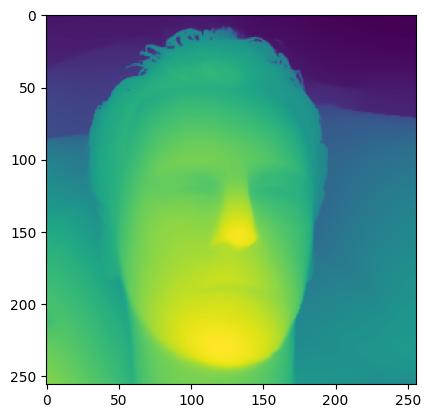

12.026519 420.9503


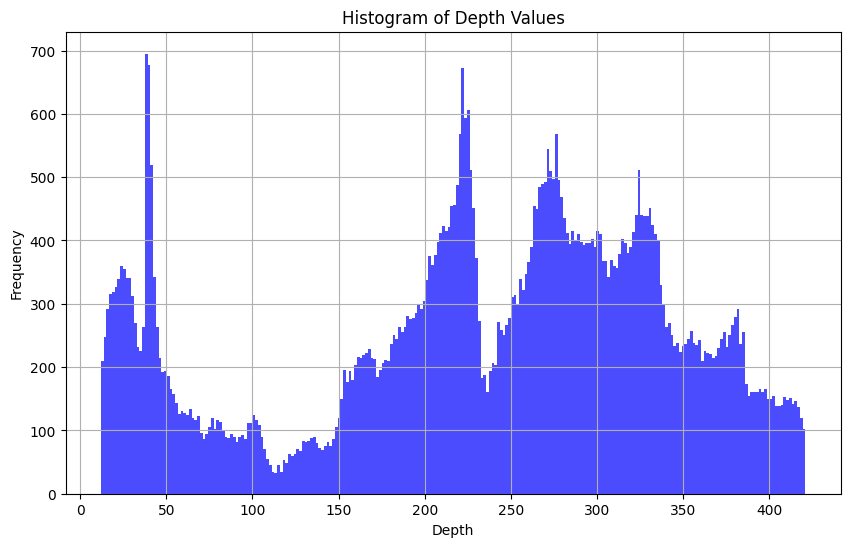

In [6]:
# Open the HDF5 file
#hdf5_file = h5py.File(hdf5_file_path, 'r')

# List all groups and datasets
#print("Listing all groups and datasets:")
#list_all_groups_and_datasets(hdf5_file)
#hdf5_file.close()


# Access a specific depth map
depth_map_path = "/00080"
depth_map = access_depth_map(hdf5_file_path, depth_map_path)
plt.imshow(depth_map)
plt.show()
hist_plot(depth_map)




# patch a file like 'data_large/s/skyscraper/00000064' or '/data_large/t/topiary_garden/00001667'


In [ ]:
'''
file_to_patch = "data_large/t/topiary_garden/00001667"

depth_anything = refresh_depth_estimator()
img = cv2.imread(f"F:/datasets/places/train_large_places365standard/{file_to_patch}.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
depth_map = depth_anything.get_rawdepth(img)

depth_map_path = f'{file_to_patch}'
update_dataset_in_hdf5(hdf5_file_path, depth_map_path, depth_map)
'''

Refreshing depth estimator
Lazy loading Depth-Anything-V2
DepthAnything-V2 parameters: 335.32M
Updated dataset 'data_large/t/topiary_garden/00001667' successfully.


# Assess u8 error

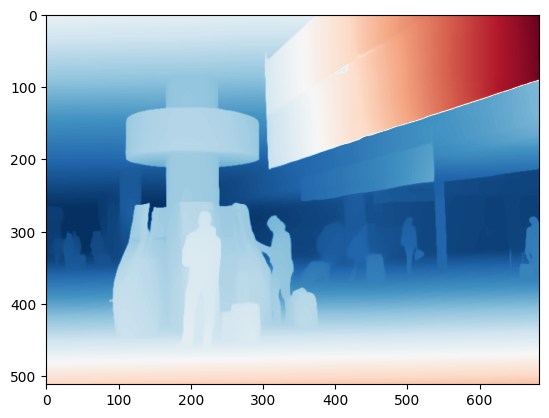

0.0 596.83795


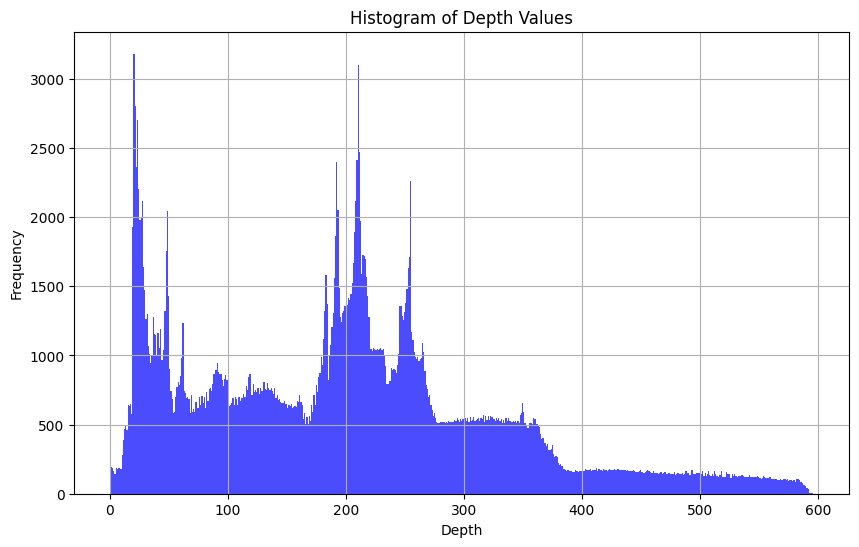

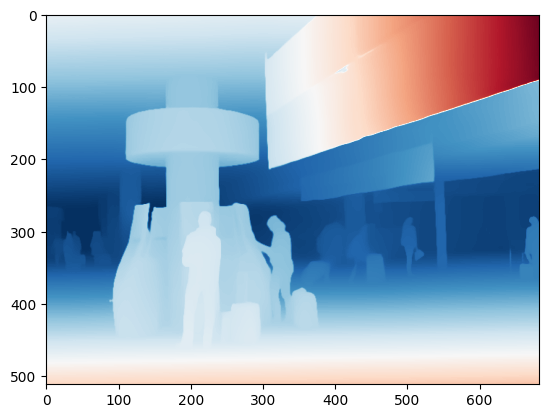

0 255


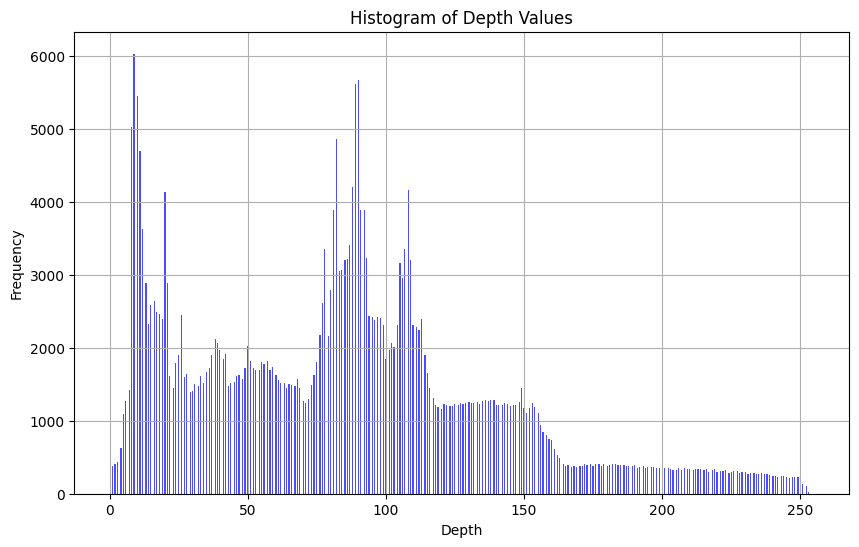

0 255


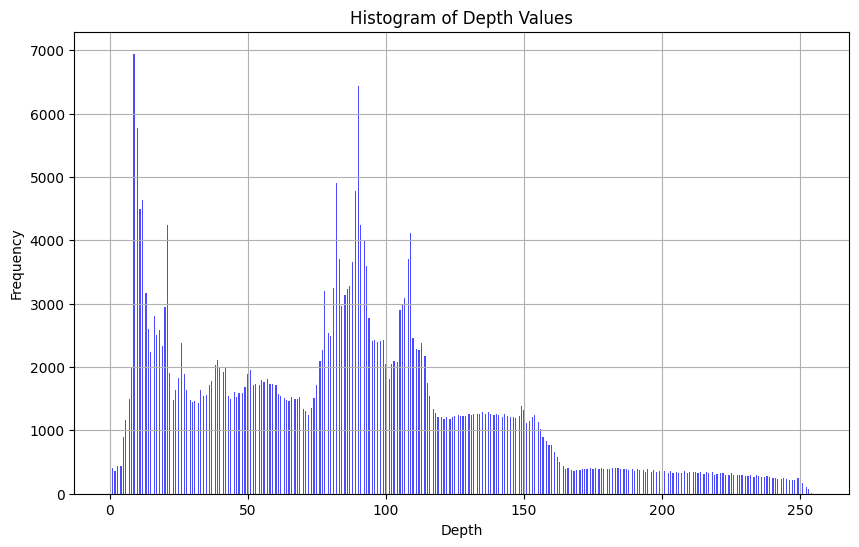

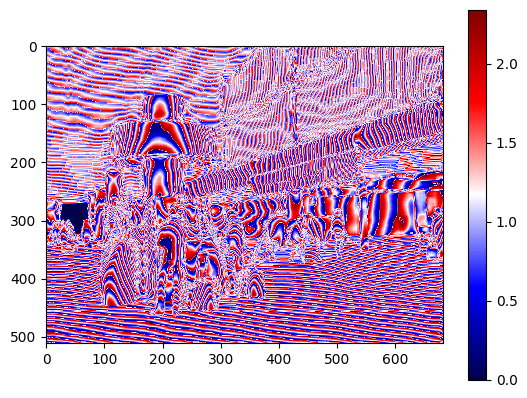

0.0 2.3405457


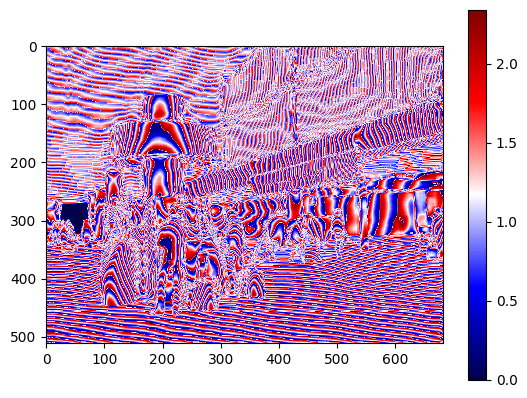

0.0 2.3405457


In [ ]:
depth_map_reconstructed = depth_map.copy()
reconstructed_min = np.min(depth_map)
reconstructed_range = np.max(depth_map) - reconstructed_min
depth_map_u8_rounded = np.round((depth_map_reconstructed - reconstructed_min) / reconstructed_range * 255)
depth_map_u8_rounded = depth_map_u8_rounded.astype(np.uint8)

depth_map_u8 = (depth_map-np.min(depth_map))/(np.max(depth_map)-np.min(depth_map))*255
depth_map_u8 = depth_map_u8.astype(np.uint8)

#color map good for depth
plt.imshow(depth_map, cmap='RdBu_r')
plt.show()
plt.hist(depth_map)
plt.imshow(depth_map_u8, cmap='RdBu_r')
plt.show()
plt.hist(depth_map_u8)
plt.show()
plt.hist(depth_map_u8_rounded)
plt.show()


depth_map_u8_back_to_float = depth_map_u8.astype(np.float32)/255
depth_map_u8_back_to_float = depth_map_u8_back_to_float*(reconstructed_range)+reconstructed_min

diff_error = depth_map-depth_map_u8_back_to_float

# my error is between 0 and 1 use a colormap that is centered around 0 and draw the colormap legend on the side
plt.imshow(diff_error, cmap='seismic')
plt.colorbar()
plt.show()
print(np.min(diff_error), np.max(diff_error))

depth_map_u8_rounded_back_to_float = depth_map_u8_rounded.astype(np.float32)/255
depth_map_u8_rounded_back_to_float = depth_map_u8_rounded_back_to_float*(reconstructed_range)+reconstructed_min
diff_error_rounded = depth_map-depth_map_u8_back_to_float
plt.imshow(diff_error_rounded, cmap='seismic')
plt.colorbar()
plt.show()
print(np.min(diff_error_rounded), np.max(diff_error_rounded))


# create new u8 hdf5

In [ ]:
# open the hdf5 and create a new hdf5 file in u8 format
# copy the data from the old hdf5 to the new hdf5
copy_hdf5_to_u8(places365_train, u8_hdf5_file_path)

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/24 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/28 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/3 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4168 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/42 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/3500 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4421 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/3469 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4681 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/37 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/3447 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/3871 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/3619 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4457 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/15 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/3068 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/3781 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/8 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4461 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4254 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/17 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/3858 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/11 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4330 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4735 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4939 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4906 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/15 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/9 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4104 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/3116 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/15 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/17 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4266 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/3 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/9 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4826 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/23 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4988 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/19 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/30 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4020 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/3 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/14 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/8 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4809 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/4366 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/10 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/2 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/1 [00:00<?, ?item/s]

Copying groups/datasets:   0%|          | 0/5000 [00:00<?, ?item/s]